<p><img alt="Colaboratory logo" height="65px" src="https://upload.wikimedia.org/wikipedia/en/thumb/b/b1/Davivienda_logo.svg/1200px-Davivienda_logo.svg.png" align="left" hspace="10px" width="20%" vspace="15px"></p>

<h1 align="center"> Prueba Técnica Profesional III Departamento de Datos no Estructurados  </h1>


<p style=»text-align: justify;»>
El Departamento de Analítica No estructurada busca profesionales con fuertes capacidades técnicas y sobretodo una fuerte capacidad analítica. Por consiguiente esta prueba intenta poner a prueba la forma en la que plantea y soluciona problmeas. Es importante que presente el código que usa para resolver el problema con el único motivo de medir sus capacidades.

Se recomienda que sea ordenado en su código y siga los lineamientos establecidos, aún así la prueba tiene un grado de flexibilidad. Se evaluará el orden y la creatividad a la hora de presentar la información. 
</p>


**Nota** <br>
Tenga en cuneta que éste ejercicio es hipotético y el banco no usará su trabajo más que para evaluar sus habiliadades para el cargo


#### **Objetivo**
El objetivo de esta prueba es lograr un filtro que discrimine automáticamente un tipo de documento sin información relevante: páginas en blanco. Se busca que este filtro reciba como entrada una carpeta con imágenes de documentos diversos y produzca como salida dos carpetas, una con imágenes de páginas en blanco y otra con imágenes de páginas con contenido.

Páginas con solo el membrete del documento se consideran páginas en blanco, así como las que, al momento de ser escaneadas, alcanzan a reflejar contenido ininteligible del reverso de la página.

## Clasificación de Imágenes

In [161]:
# Montar el notebook en google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [182]:
# Importar las librerías requeridas
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import cv2

### 1.Importe las imágenes
En la carpeta adjunta se encontrará con documentos tanto en blanco como con contenido. Su objetivo es generar un modelo que clasifique los elementos en "Con Contenido" y "Sin Contenido". Para eso puede utilizar reglas o modelos especificos.

In [155]:
# Definir la ruta y las categorias de los documentos
dir = 'Prueba_conocimientos_davivienda/Ejercicio_1_Imagenes/Datasets'
categories = ['Blanco', 'Documentos']

El primer paso es convertir las imágenes de documentos en blanco y con contenido en conjuntos de datos de entrenamiento y prueba. Para evitar imágenes con diferentes tamaños definimos el tamaño de cada imagen 50px50p. En este problema específico no necesitamos tener el cuenta el color en las imágenes para identificar si tienen contenido o no, por tanto podemos aplicar filtros de escala de grises para  trabajar con arreglos unidimensionales en lugar de tridimensionales (RGB).

In [168]:
training_data = []
img_size = (50, 50) # Definir el tamaño de las imágenes

def create_training_data(): 
  for category in categories: # Categorías Blanco y Documentos
    path = os.path.join(dir, category) # Crear ruta por categoría
    class_num = categories.index(category) # Número de clases
    for img in os.listdir(path):            # Iterar sobre cada imagen por categoria
        try:
          img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE) # Convertir en arreglo
          new_array = cv2.resize(img_array, img_size) # Redimensionar imágenes
          training_data.append([new_array, class_num]) # Añadir a training_data (img y clase)
        except Exception as e: # Evitar errores en el conjunto de salida
            pass

create_training_data()

### 2. Estructure la información
Debido a que las imagenes son archivos separados lo primero que debe hacer es importarlas (recuerde que una imagen es esencialmente un arreglo de vectores), puede esturcturarlas a su gusto y marcar de ser necesario aquellas que va usar como test de pruebas. 

In [169]:
# Deinir "X" con las características y "y" con las etiquetas
X = []
y = []

for features, label in training_data:
  X.append(features)
  y.append(label)

# Convertir en arreglos numpy
X = np.array(X).reshape(-1, 50, 50, 1) # Redimensionar X
y = np.array(y)

In [170]:
from sklearn.model_selection import train_test_split

# Dividir el dataset en entrenamiento y prueba utilizando train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2, # 20% datos para prueba
                                                    random_state=1,
                                                    shuffle=True)

Se procede a convertir el vector binario de las etiquetas en una matriz de valores binarios por clase

In [171]:
num_classes = 2 # Definir número de clases
# Convertir y_train en matriz de valores binarios
y_train_binary = tf.keras.utils.to_categorical(y_train, num_classes)
# Convertir y_test en matriz de valores binarios
y_test_binary = tf.keras.utils.to_categorical(y_test, num_classes)

### 3. Describa su Estrategia de Análisis
<p>Tiene libertad en la metodología para la clasificación. Aún así debe describir brevemente como realizará el análisis. Por ejemplo, si usará un modelo en donde requiera clasificar una cantidad pequeña de la data mencionelo o si planea condicionar la clasifiaciónes a reglas indique que reglas usará. Además si usa herramientas externas describalas y explique. </p>


In [172]:
# IMportar los módulos necesarios para contruir el modelo (CNN)
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D

El segundo paso es contruir el modelo, se procede a usar una red neuronal convolucional para clasificar las imágenes con y sin contenido. Las imágenes tienen un rango de píxeles de 0 a 255 por tanto se divide X entre 255 para normalizar.



In [173]:
X = X/255.0

model = Sequential()

model.add(Conv2D(256, (3, 3), input_shape=X_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(64))

model.add(Dense(2, activation='softmax'))

Se compila el modelo con la función de pérdida "binary crossentropy", el optimizador "adam" y la métrica de monitoreo "accuracy".

In [174]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

Se entrena el modelo con los datos de entrenamiento, se define el tamaño del lote con el que se va a alimentar la red en cada iteración y se definen 5 iteraciones asignando un 10% de los datos a la validación del modelo.

In [175]:
model.fit(X_train, y_train_binary, batch_size=32, epochs=5, validation_split=0.1)

Epoch 1/5
6/6 [==============================] - 8s 1s/step - loss: 334.4733 - accuracy: 0.4237 - val_loss: 10.2962 - val_accuracy: 0.8000
Epoch 2/5
6/6 [==============================] - 9s 1s/step - loss: 16.4599 - accuracy: 0.7684 - val_loss: 7.4392 - val_accuracy: 0.9000
Epoch 3/5
6/6 [==============================] - 7s 1s/step - loss: 2.6006 - accuracy: 0.9266 - val_loss: 3.1890 - val_accuracy: 1.0000
Epoch 4/5
6/6 [==============================] - 7s 1s/step - loss: 0.5908 - accuracy: 0.9944 - val_loss: 3.6665 - val_accuracy: 0.9000
Epoch 5/5
6/6 [==============================] - 7s 1s/step - loss: 0.9145 - accuracy: 0.9661 - val_loss: 0.0807 - val_accuracy: 1.0000


### 4. Interpretación de Reusultados
<p>Al final tiene que presentar la información en una matriz que muestre la calidad de su clasificación y evaluarla con la medida que guste. </p>
<br>
<img src="https://www.ecured.cu/images/3/31/Matrices_de_confusi%C3%B3n.png" >

In [176]:
from sklearn.metrics import confusion_matrix, classification_report

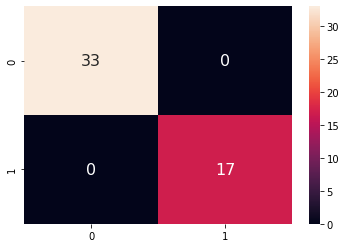

In [186]:
# Obtenemos la matriz de confusión
y_pred = model.predict(X_test)
cm = confusion_matrix(np.argmax(y_test_binary, axis=1), np.argmax(y_pred, axis=1))

sns.heatmap(cm, annot=True, annot_kws={"size": 16})

In [178]:
# Obtenemos el reporte de las métricas de evaluación
report = classification_report(np.argmax(y_test_binary, axis=1), np.argmax(y_pred, axis=1))
print(report, sep = "\n")

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       1.00      1.00      1.00        17

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50

